In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
transactions=pd.read_csv('transactions.csv')
products=pd.read_csv('products.csv')
customers=pd.read_csv('customers.csv')

In [4]:
transactions.info()
products.info()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pan

In [5]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [6]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


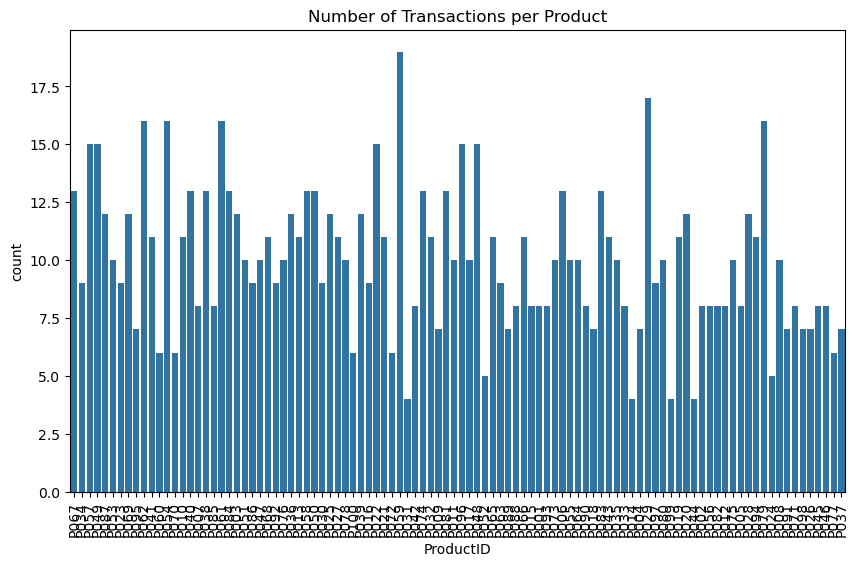

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=transactions, x='ProductID')
plt.title('Number of Transactions per Product')
plt.xticks(rotation=90)
plt.show()

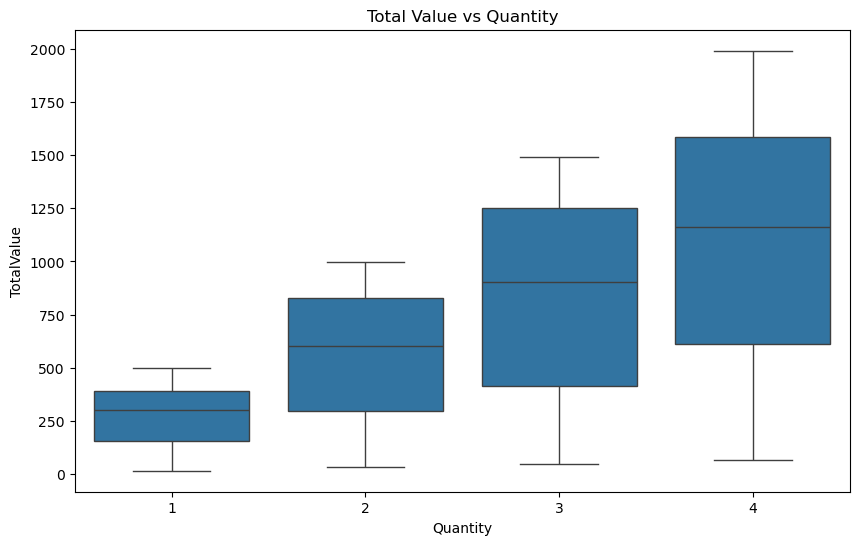

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=transactions, x='Quantity', y='TotalValue')
plt.title('Total Value vs Quantity')
plt.show()

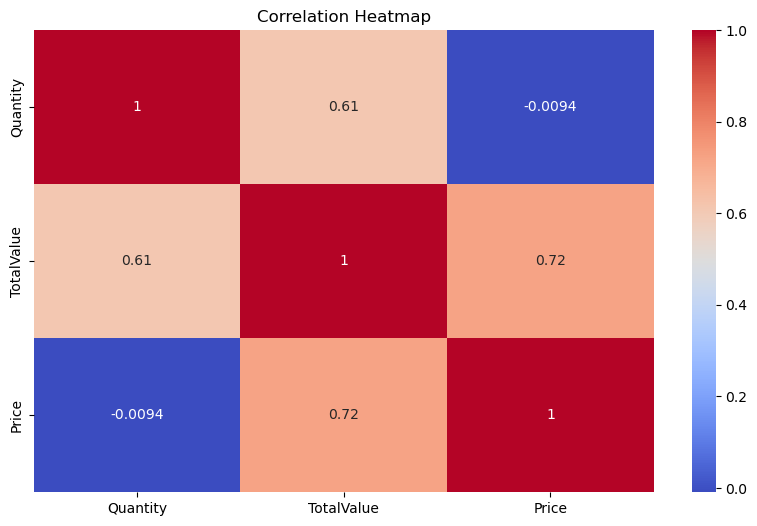

In [9]:
plt.figure(figsize=(10, 6))

numerical_transactions = transactions.select_dtypes(include=['number'])
sns.heatmap(numerical_transactions.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

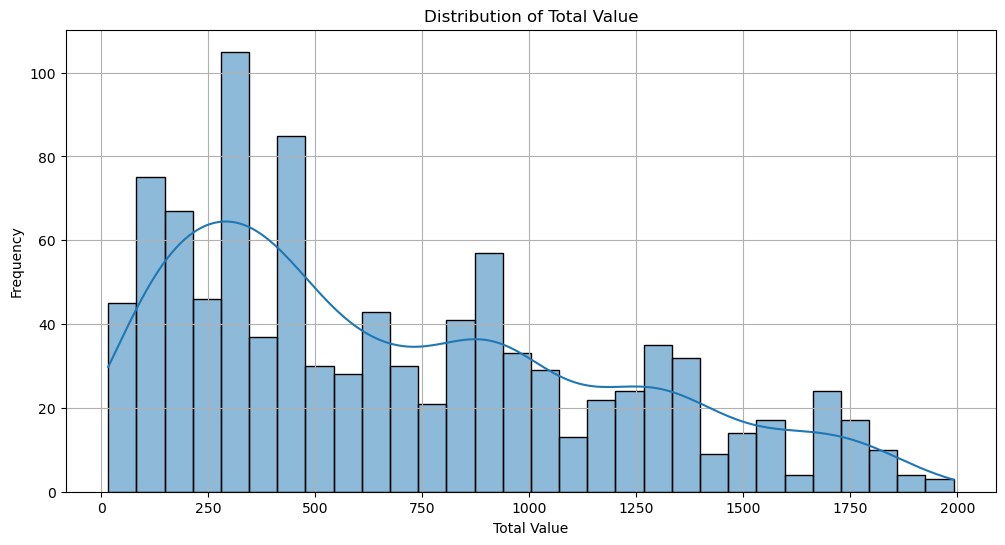

In [10]:

plt.figure(figsize=(12, 6))
sns.histplot(transactions['TotalValue'], bins=30,kde=True )
plt.title('Distribution of Total Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()





C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\970583780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='pastel')


AttributeError: module 'seaborn' has no attribute 'piechart'

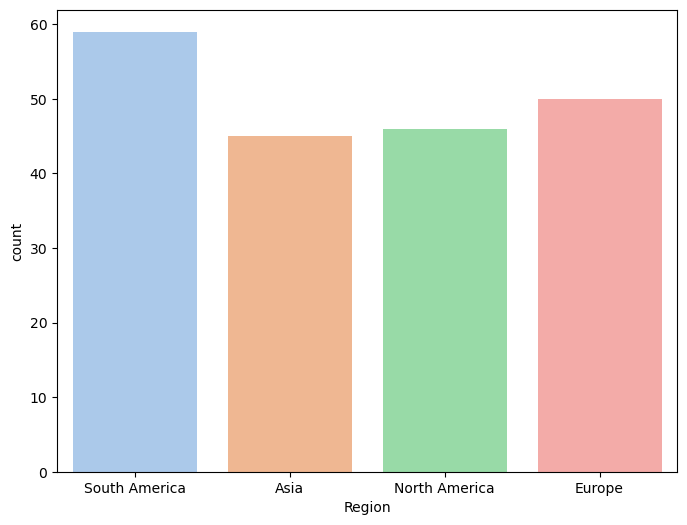

In [11]:

plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', palette='pastel')
sns.piechart
plt.title('Customer Distribution by Region')
plt.ylabel('Number of Customers')
plt.grid()
plt.show()

          Region  Total Revenue
0           Asia      152074.97
1         Europe      166254.63
2  North America      152313.40
3  South America      219352.56


C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\3426692849.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_revenue_by_region, x='Region', y='Total Revenue', palette='viridis')


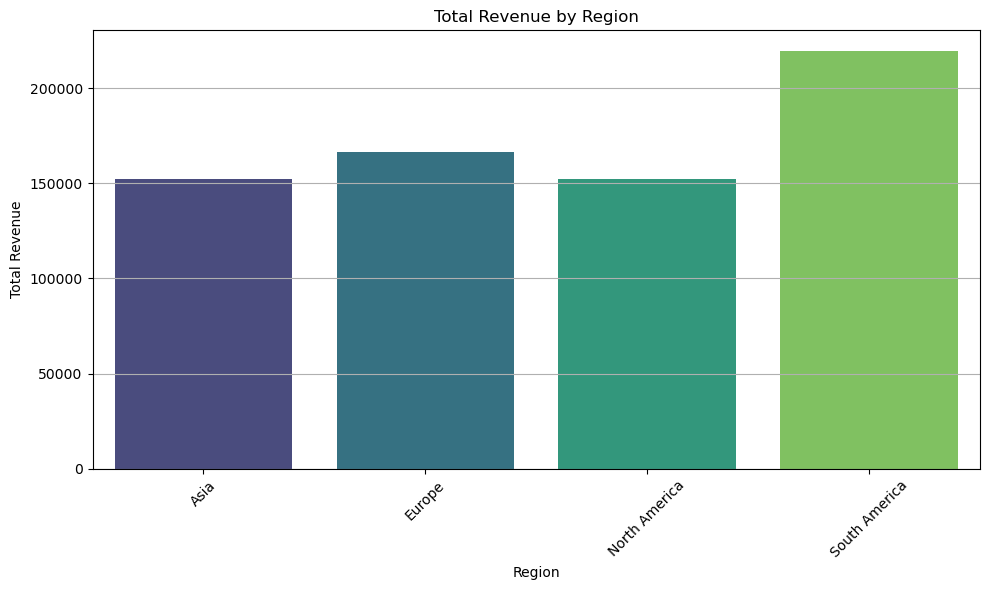

In [12]:

transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')
merged_data = transactions.merge(customers, on='CustomerID')
total_revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
total_revenue_by_region.columns = ['Region', 'Total Revenue']
print(total_revenue_by_region)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_revenue_by_region, x='Region', y='Total Revenue', palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

      Category  Total Revenue
0        Books      192147.47
2  Electronics      180783.50
1     Clothing      166170.66


C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\3390592774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='Category', y='Total Revenue', palette='magma')


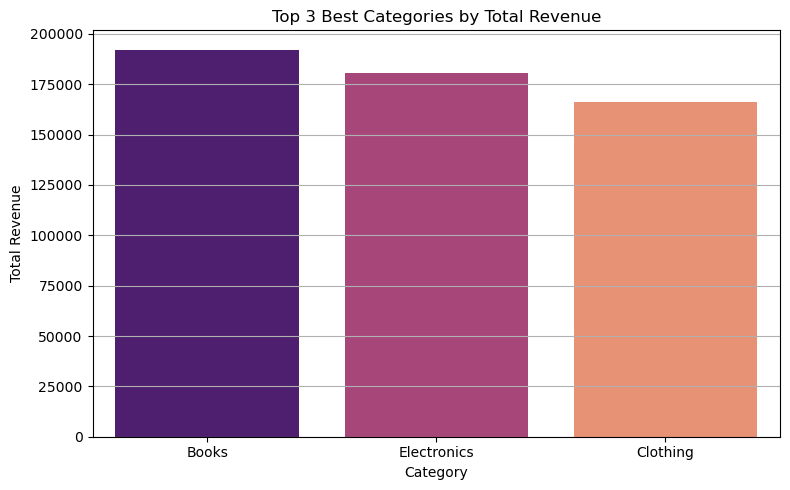

In [13]:


transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')
merged_data = transactions.merge(products, on='ProductID')
total_revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
total_revenue_by_category.columns = ['Category', 'Total Revenue']
top_categories = total_revenue_by_category.sort_values(by='Total Revenue', ascending=False).head(3)
print(top_categories)
plt.figure(figsize=(8, 5))
sns.barplot(data=top_categories, x='Category', y='Total Revenue', palette='magma')
plt.title('Top 3 Best Categories by Total Revenue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

Top 5 Products by Quantity Sold:
   ProductID  Total_Quantity  Total_Revenue
58      P059              46       13947.20
53      P054              46        2635.80
28      P029              45       19513.80
78      P079              43       17946.91
60      P061              43        6749.28

Top 5 Products by Revenue Generated:
   ProductID  Total_Quantity  Total_Revenue
28      P029              45       19513.80
78      P079              43       17946.91
47      P048              43       17905.20
19      P020              38       15060.92
61      P062              39       14592.24


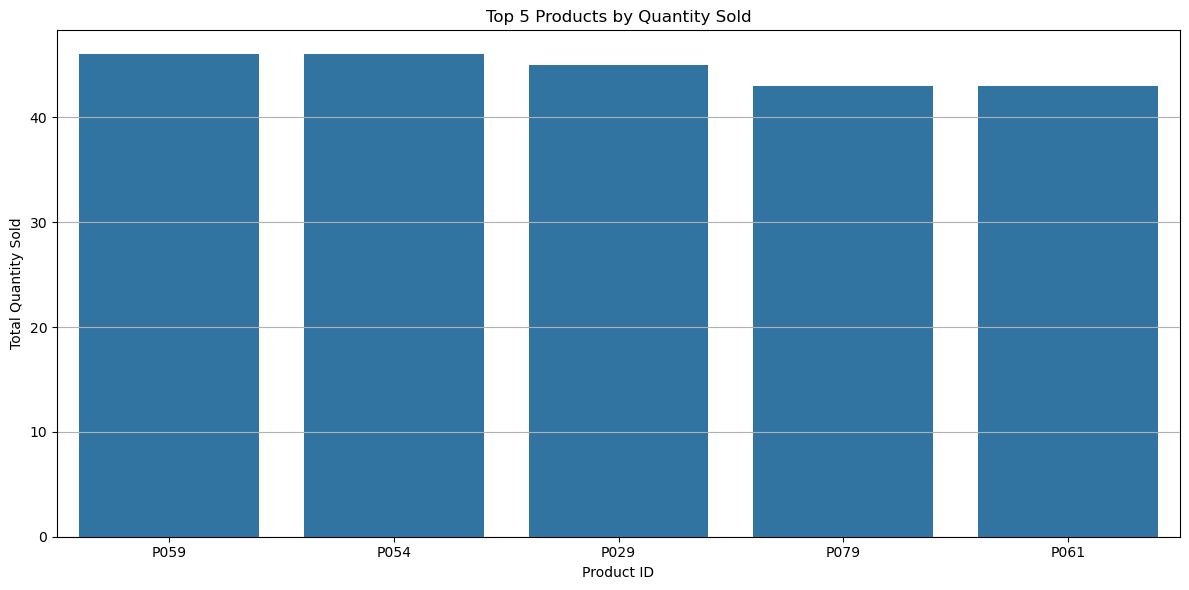

C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\639761798.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_revenue_products, x='ProductID', y='Total_Revenue',palette='pastel')


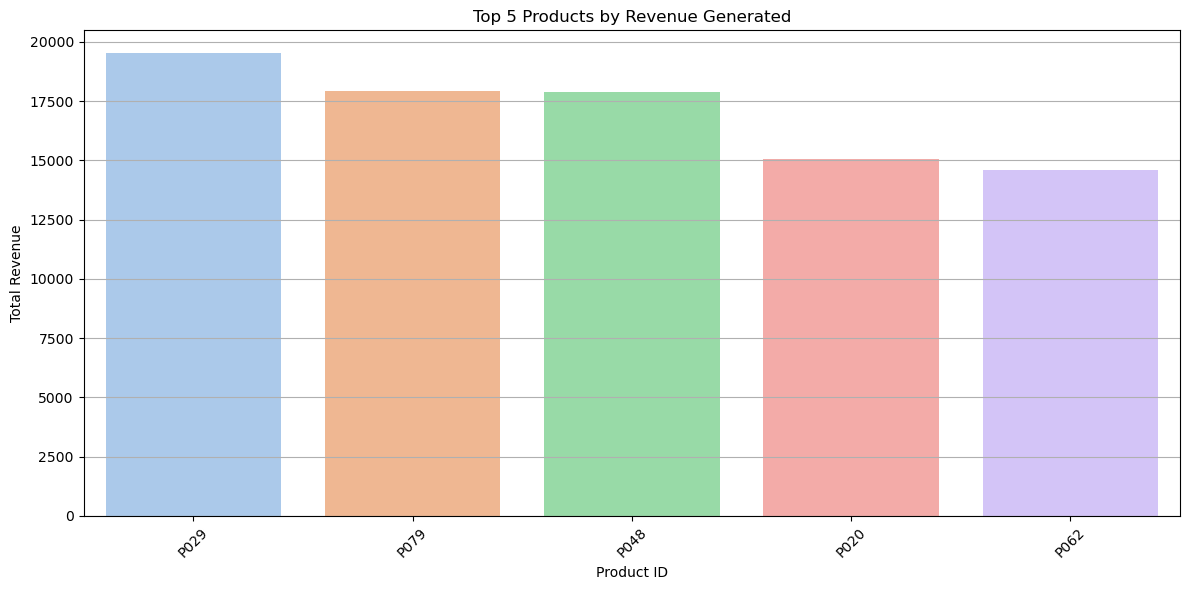

In [14]:

transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')
product_summary = transactions.groupby('ProductID').agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue=('TotalValue', 'sum')
).reset_index()
top_quantity_products = product_summary.sort_values(by='Total_Quantity', ascending=False).head(5)
top_revenue_products = product_summary.sort_values(by='Total_Revenue', ascending=False).head(5)
print("Top 5 Products by Quantity Sold:")
print(top_quantity_products)
print("\nTop 5 Products by Revenue Generated:")
print(top_revenue_products)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_quantity_products, x='ProductID', y='Total_Quantity')
plt.title('Top 5 Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_revenue_products, x='ProductID', y='Total_Revenue',palette='pastel')
plt.title('Top 5 Products by Revenue Generated')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Top 5 Products by Quantity Sold:
   ProductID          ProductName  Total_Quantity  Total_Revenue
58      P059      SoundWave Jeans              46       13947.20
53      P054   SoundWave Cookbook              46        2635.80
28      P029   TechPro Headphones              45       19513.80
78      P079       ActiveWear Rug              43       17946.91
60      P061  HomeSense Desk Lamp              43        6749.28

Top 5 Products by Revenue Generated:
   ProductID         ProductName  Total_Quantity  Total_Revenue
28      P029  TechPro Headphones              45       19513.80
78      P079      ActiveWear Rug              43       17946.91
47      P048    TechPro Cookbook              43       17905.20
19      P020   ActiveWear Jacket              38       15060.92
61      P062     HomeSense Novel              39       14592.24


C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\2583170499.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_quantity_products, x='ProductName', y='Total_Quantity', palette='magma')


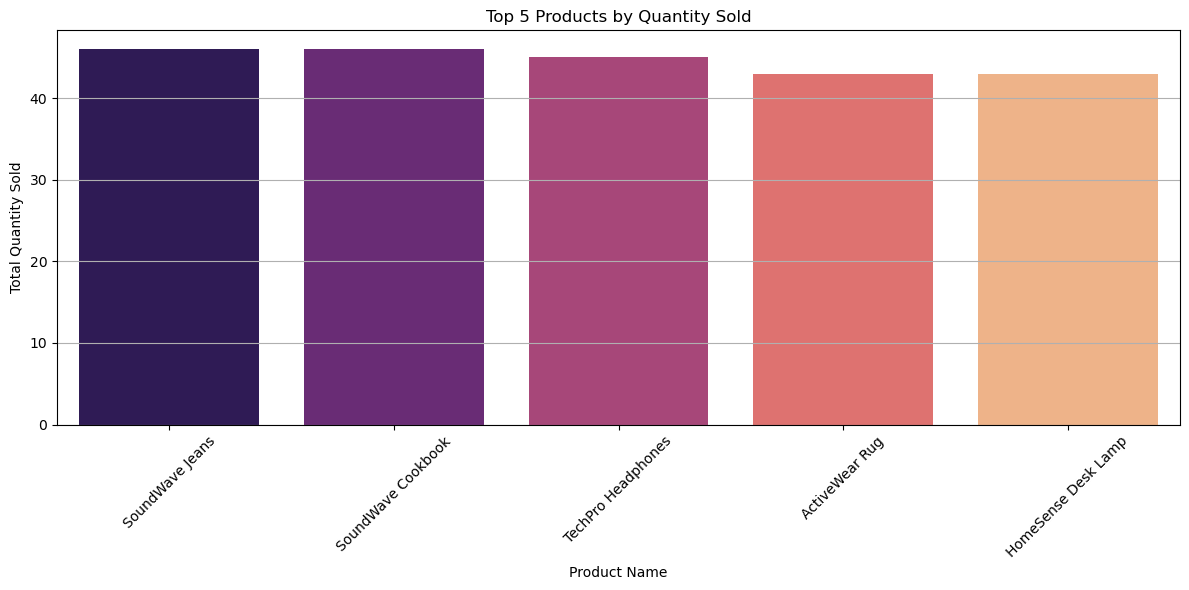

C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\2583170499.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_revenue_products, x='ProductName', y='Total_Revenue', palette='pastel')


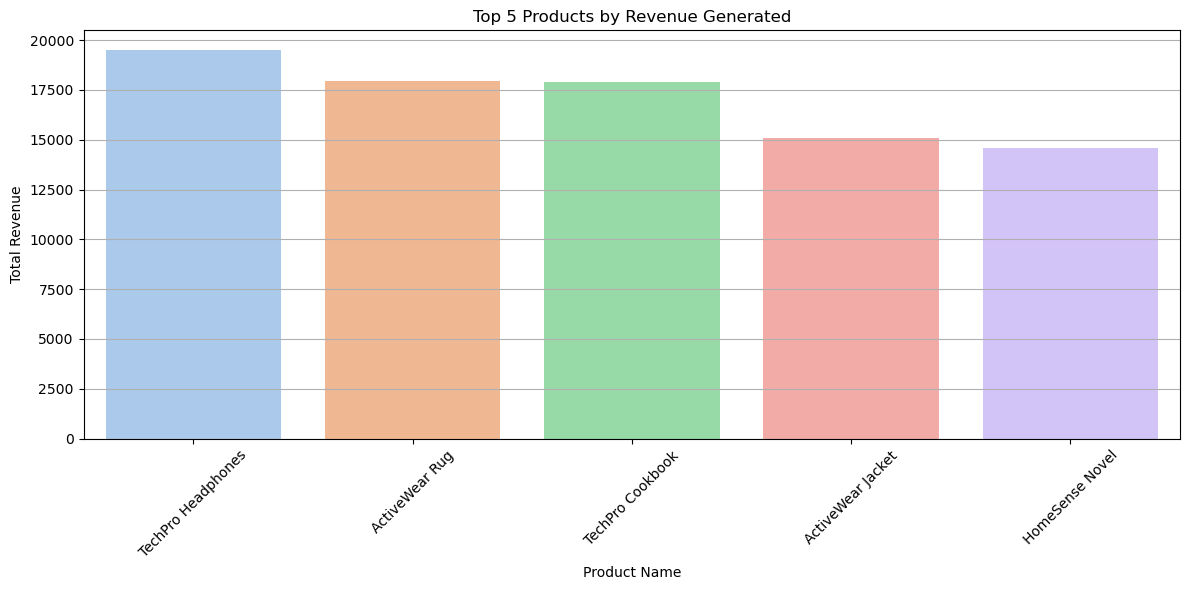

In [15]:


transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')
merged_data = transactions.merge(products, on='ProductID')
product_summary = merged_data.groupby(['ProductID', 'ProductName']).agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue=('TotalValue', 'sum')
).reset_index()
# Total Quantity and get top 5 products
top_quantity_products = product_summary.sort_values(by='Total_Quantity', ascending=False).head(5)
# Total Revenue and get top 5 products
top_revenue_products = product_summary.sort_values(by='Total_Revenue', ascending=False).head(5)
# top 5 products
print("Top 5 Products by Quantity Sold:")
print(top_quantity_products)

print("\nTop 5 Products by Revenue Generated:")
print(top_revenue_products)
# Top 5 Products by Quantity
plt.figure(figsize=(12, 6))
sns.barplot(data=top_quantity_products, x='ProductName', y='Total_Quantity', palette='magma')
plt.title('Top 5 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
#  Top 5 Products by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=top_revenue_products, x='ProductName', y='Total_Revenue', palette='pastel')
plt.title('Top 5 Products by Revenue Generated')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Top 5 Customers by Revenue Generated:
    CustomerID   CustomerName  Total_Revenue
140      C0141   Paul Parsons       10673.87
53       C0054   Bruce Rhodes        8040.39
64       C0065   Gerald Hines        7663.70
155      C0156  William Adams        7634.45
81       C0082   Aimee Taylor        7572.91


C:\Users\DELL\AppData\Local\Temp\ipykernel_13176\640601269.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='CustomerName', y='Total_Revenue', palette='magma')


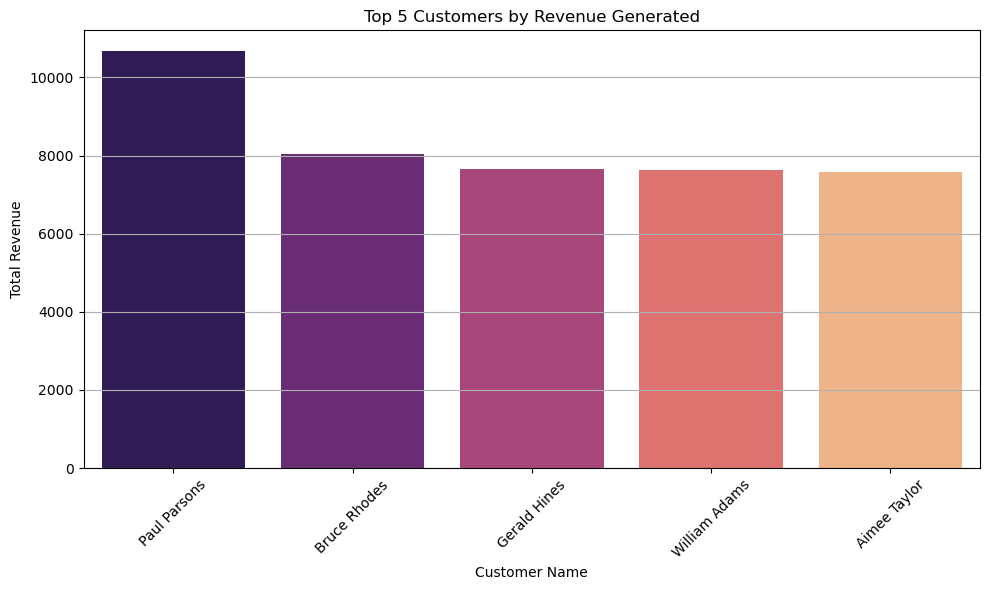

In [16]:

transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')
merged_data = transactions.merge(customers, on='CustomerID')
customer_summary = merged_data.groupby(['CustomerID', 'CustomerName']).agg(
    Total_Revenue=('TotalValue', 'sum')
).reset_index()
top_customers = customer_summary.sort_values(by='Total_Revenue', ascending=False).head(5)
print("Top 5 Customers by Revenue Generated:")
print(top_customers)
plt.figure(figsize=(10, 6))#top s customer name
sns.barplot(data=top_customers, x='CustomerName', y='Total_Revenue', palette='magma')
plt.title('Top 5 Customers by Revenue Generated')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [21]:

total_revenue = transactions['TotalValue'].sum()
total_quantity = transactions['Quantity'].sum()

print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Total Quantity: {total_quantity}")

Total Revenue: $689995.56
Total Quantity: 2537


In [29]:

regions = ['North', 'South', 'East', 'West']
transactions['Region'] = [regions[i % len(regions)] for i in range(len(transactions))]
total_revenue_by_region = transactions.groupby('Region')['TotalValue'].sum().reset_index()
total_revenue_by_region.columns = ['Region', 'Total Revenue']
print(total_revenue_by_region)

  Region  Total Revenue
0   East      171808.84
1  North      169488.80
2  South      176242.50
3   West      172455.42


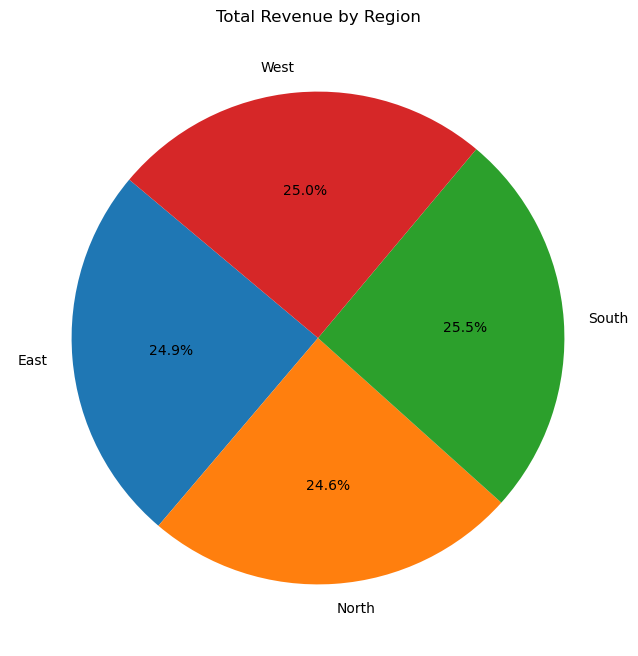

In [31]:

regions = ['North', 'South', 'East', 'West']
transactions['Region'] = [regions[i % len(regions)] for i in range(len(transactions))]
total_revenue_by_region = transactions.groupby('Region')['TotalValue'].sum()
labels = total_revenue_by_region.index
sizes = total_revenue_by_region.values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue by Region')
#plt.axis('equal') 
plt.show()